# 读取数据

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/insurance.csv', sep=',')
data.head(n=6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


# EDA 数据探索

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

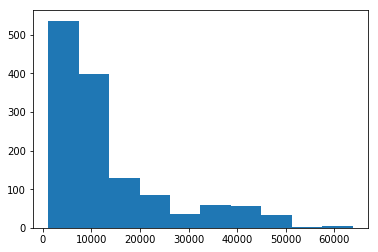

In [3]:
plt.hist(data['charges'])

(array([ 19.,  27.,  52.,  53.,  47.,  54.,  71.,  84.,  90., 108., 126.,
        157.,  98.,  58.,  67.,  56.,  35.,  80.,  50.,   6.]),
 array([ 7.02275569,  7.22477015,  7.42678461,  7.62879907,  7.83081352,
         8.03282798,  8.23484244,  8.4368569 ,  8.63887136,  8.84088581,
         9.04290027,  9.24491473,  9.44692919,  9.64894365,  9.8509581 ,
        10.05297256, 10.25498702, 10.45700148, 10.65901594, 10.86103039,
        11.06304485]),
 <a list of 20 Patch objects>)

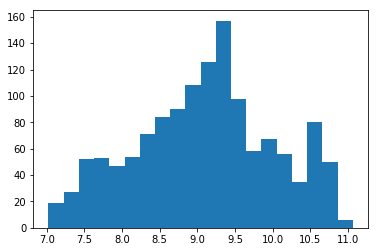

In [5]:
plt.hist(np.log(data['charges']), bins=20)

# 特征工程

In [6]:
data = pd.get_dummies(data)
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
x = data.drop('charges', axis=1)
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
y = data['charges']

In [10]:
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True).fit(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [21]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


array([[ 0.08653871,  0.20869392, -0.13377462, ..., -0.5543127 ,
        -0.62678317,  1.78810218],
       [-1.34329769,  0.74643788, -0.95754468, ..., -0.5543127 ,
         1.59544807, -0.55925216],
       [-1.41478951,  0.08919527, -0.95754468, ..., -0.5543127 ,
         1.59544807, -0.55925216],
       ...,
       [ 0.30101417, -0.18936579,  0.68999543, ..., -0.5543127 ,
        -0.62678317, -0.55925216],
       [ 0.08653871,  0.20869392,  0.68999543, ..., -0.5543127 ,
        -0.62678317,  1.78810218],
       [ 1.37339147,  0.94587145, -0.13377462, ..., -0.5543127 ,
        -0.62678317, -0.55925216]])

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_scaled = poly_features.fit_transform(x_train_scaled)
x_test_scaled = poly_features.fit_transform(x_test_scaled)

# 模型训练

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

reg = LinearRegression()

reg.fit(x_train_scaled, np.log1p(y_train))
y_predict = reg.predict(x_test_scaled)

In [34]:
ridge = Ridge(alpha=0.4)

ridge.fit(x_train_scaled, np.log1p(y_train))
y_predict_ridge = ridge.predict(x_test_scaled)

In [39]:
booster = GradientBoostingRegressor()

booster.fit(x_train_scaled, np.log1p(y_train))
y_predict_boost = ridge.predict(x_test_scaled)

# 模型评估

In [31]:
from sklearn.metrics import mean_squared_error

log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=reg.predict(x_train_scaled)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_predict))
rmse_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(reg.predict(x_train_scaled))))
rmse_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(reg.predict(x_test_scaled))))

log_rmse_train, log_rmse_test, rmse_train, rmse_test

(0.3536371489525544, 0.39371753546305405, 5070.812975583753, 5125.170372384354)

In [35]:
log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=ridge.predict(x_train_scaled)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_predict_ridge))
rmse_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(ridge.predict(x_train_scaled))))
rmse_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(ridge.predict(x_test_scaled))))

log_rmse_train, log_rmse_test, rmse_train, rmse_test

(0.3534913754377518, 0.39360130327172227, 5071.387838487504, 5136.811167129137)

In [40]:
log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=booster.predict(x_train_scaled)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_predict_boost))
rmse_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(booster.predict(x_train_scaled))))
rmse_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(booster.predict(x_test_scaled))))

log_rmse_train, log_rmse_test, rmse_train, rmse_test

(0.2638880698167762,
 0.40108622040704345,
 3738.4082462553074,
 4586.566830607261)